In [29]:
import re

alphas = [0.5, 1, 2, 3, 4, 5, 10]
mrr_5_dict = {}
ndcg_5_dict = {}
dcg_5_dict = {}
train_loss_dict = {}
for alpha in alphas:
    mrr_5_list = []
    ndcg_5_list = []
    dcg_5_list = []
    train_loss_list = []
    with open(f'approxndcg/approxndcg-lr0001-fold1-{alpha}/results/test_run_{alpha}/training.log') as f:
        for line in f:
            mrr_5 = re.search(r'Train mrr_5 (\S+)', line)
            ndcg_5 = re.search(r'Train ndcg_5 (\S+)', line)
            dcg_5 = re.search(r'Train dcg_5 (\S+)', line)
            train_loss = re.search(r'Train loss: (\S+)', line)
            if mrr_5:
                mrr_5_list.append(float(mrr_5.group(1)))
            if ndcg_5:
                ndcg_5_list.append(float(ndcg_5.group(1)))
            if dcg_5:
                dcg_5_list.append(float(dcg_5.group(1)))
            if train_loss:
                train_loss_list.append(float(train_loss.group(1)))

    mrr_5_dict[alpha] = mrr_5_list
    ndcg_5_dict[alpha] = ndcg_5_list
    dcg_5_dict[alpha] = dcg_5_list
    train_loss_dict[alpha] = train_loss_list
    # mrr_5_dict[i] = mrr_5_list
    # ndcg_5_dict[i] = ndcg_5_list
    # dcg_5_dict[i] = dcg_5_list
    # train_loss_dict[i] = train_loss_list

In [30]:
train_loss_dict

{0.5: [-0.4759942874908447,
  -0.4752175316015879,
  -0.475476855913798,
  -0.47369736623764036,
  -0.4720279207229614,
  -0.47426867397626243,
  -0.4754861648082733,
  -0.4760165007909139,
  -0.47561988774935404,
  -0.4756716745694478,
  -0.47579169845581054,
  -0.47609241302808125,
  -0.47565628814697264,
  -0.47662758191426596,
  -0.4765061683654785,
  -0.47683209482828776,
  -0.4770844990412394,
  -0.4770003468990326,
  -0.4767545636494954,
  -0.47591093174616494,
  -0.4753745567003886,
  -0.4759067548116048,
  -0.47673958746592204,
  -0.47670825640360515,
  -0.4764729618231455,
  -0.47610510389010113,
  -0.4747577420870463,
  -0.47300749651590984,
  -0.47179978704452513,
  -0.47183852195739745],
 1: [-0.49301478362083434,
  -0.4939236407279968,
  -0.495515557607015,
  -0.4921400980949402,
  -0.4920970751444499,
  -0.4909352774620056,
  -0.4937390259106954,
  -0.49207874822616576,
  -0.4888538495699565,
  -0.4904210871060689,
  -0.49143285528818764,
  -0.4908167781829834,
  -0.4925

In [27]:
# Initialize a dictionary to store the sum of values for each key
sum_dict = {}

# Loop through each key in the dictionary
for key in train_loss_dict:
    # Loop through each value in the list for the current key
    for i, val in enumerate(train_loss_dict[key]):
        # Add the current value to the sum for the current position and key
        if i in sum_dict:
            sum_dict[i][key] = val
        else:
            sum_dict[i] = {key: val}

# Calculate the average for each position
# avg_dict = {}
# for pos in sum_dict:
#     avg_dict[pos] = sum(sum_dict[pos].values()) / len(sum_dict[pos])
#
# print(avg_dict)

# Calculate the average for each position
avg_list = []
for pos in sum_dict:
    avg_val = sum(sum_dict[pos].values()) / len(sum_dict[pos])
    avg_list.append(avg_val)

print(avg_list)

[-0.49301478362083434, -0.4939236407279968, -0.495515557607015, -0.4921400980949402, -0.4920970751444499, -0.4909352774620056, -0.4937390259106954, -0.49207874822616576, -0.4888538495699565, -0.4904210871060689, -0.49143285528818764, -0.4908167781829834, -0.49256608621279396, -0.4917798859278361, -0.4944932932853699, -0.49162484327952066, -0.49375398953755695, -0.4948812928199768, -0.49198848072687784, -0.4904491793314616, -0.49097536826133725, -0.49317097473144533, -0.49128923352559406, -0.48839040311177573, -0.4898479111989339, -0.4915078770319621, -0.4931430002848307, -0.48973481909434, -0.4928630731105804, -0.49207532254854836]


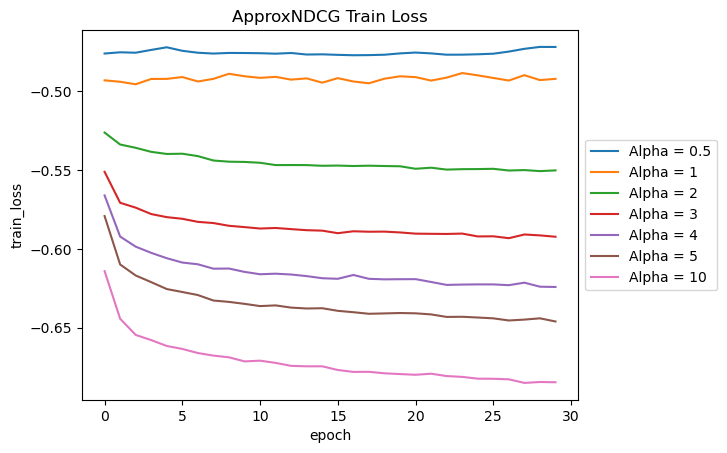

In [33]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

for key in train_loss_dict:
    ax.plot(train_loss_dict[key], label=f"Alpha = {key}")

ax.set(xlabel='epoch', ylabel='train_loss',
       title='ApproxNDCG Train Loss')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
with open('approxndcg/approxndcg-lr0001-fold1-1/results/test_run_1/training.log') as f:
    for line in f:
        mrr_5 = re.search(r'Train mrr_5 (\S+)', line)
        ndcg_5 = re.search(r'Train ndcg_5 (\S+)', line)
        dcg_5 = re.search(r'Train dcg_5 (\S+)', line)
        if mrr_5:
            mrr_5_list.append(float(mrr_5.group(1)))
        if ndcg_5:
            ndcg_5_list.append(float(ndcg_5.group(1)))
        if dcg_5:
            dcg_5_list.append(float(dcg_5.group(1)))